In [1]:
import nltk
import matplotlib.pyplot as plt
import re
import csv

In [2]:
# Read data
text = []
label = []
text_cleaned = []
with open("./data/IMDBsentiment/Train.csv", "r", encoding="utf-8") as file: #Read data to the variable text
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        text.append(row[0])
        label.append(row[1])

# Clean data (remove punctuation, lower case, remove multiple spaces)
for x in text:
    filtered_x = re.sub(r'[^\w\s]|[äöüÄÖÜß]', ' ', x)
    lower_x = filtered_x.lower()
    text_cleaned.append(re.sub(' +', ' ', lower_x))

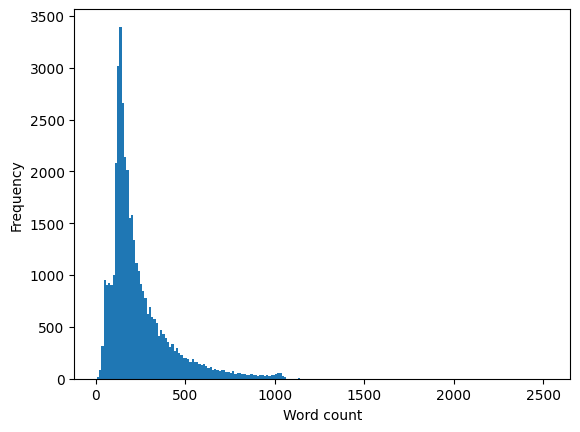

In [3]:
# Plot histogram of word counts in the data
word_counts = []
for x in text_cleaned:
    word_counts.append(len(x.split()))

plt.hist(word_counts, bins=200)
plt.xlabel('Word count')
plt.ylabel('Frequency') 
plt.show()

Count negative datasets (0) 20019
Count positiv datasets (1) 19981


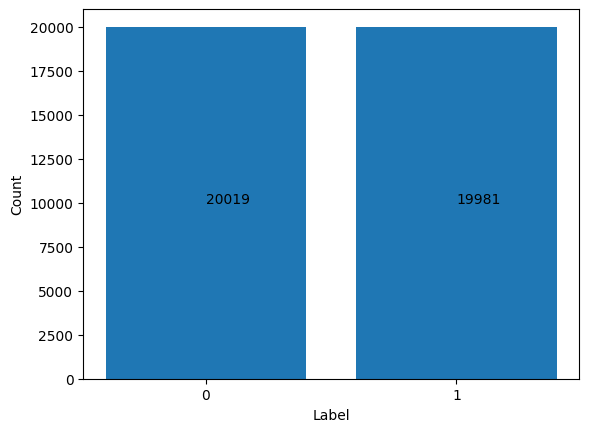

In [4]:
# Plot histogram of label that shows the distribution of positive and negative reviews
label_counts = []
count_zero = 0
count_one = 0
values = []
for x in label:
    if x == '1':
        count_one = count_one + 1
    if x == '0':
        count_zero = count_zero + 1
values.append(count_one)
values.append(count_zero)
print("Count negative datasets (0)",count_zero)
print("Count positiv datasets (1)",count_one)
plt.text(0, 10000, count_zero)
plt.text(1, 10000, count_one)
plt.bar(['0', '1'], values)
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()

In [5]:
# print the 10 most frequent words in the data
# filter out stopwords
# add br to stopwords because it is a html tag
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('br')
text_cleaned_stopwords = []
word_counts = {}
for x in text_cleaned:
    tokens = nltk.word_tokenize(x)
    filtered_tokens = [token for token in tokens if token not in stopwords]
    for word in filtered_tokens:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts[0:10]:
    print(f'{word}: {count}')

movie: 70539
film: 63660
one: 42886
like: 32293
good: 23924
time: 20170
even: 19968
would: 19687
really: 18556
story: 18487
